
# Intelligent Clinical Decision Support System: Leveraging Symptom Analysis for Accurate Disease Prediction



## Introduction

The aim is to develop a multiclass classification ML-driven intelligent clinical decision support system integrated with an expert system. In this system, an inference engine will map each classification, based on a set of rules, to a knowledge base, which is a repository or organized collection of facts or information specific to the domain, to provide support to the users. The system will allow users to input symptoms and suggest possible medical conditions along with general advice.

The following supervised learning techniques for classification and comparative analysis will be used:
1. Decision Tree
2. Random Forest

The dataset consists of various diseases, their symptoms, descriptions, precautions to be taken, and their associated weights. 
It was obtained from **[kaggle](https://www.kaggle.com/datasets/itachi9604/disease-symptom-description-dataset)**.<br>
_**Note:** One hot encoding technique was used to convert various symptoms into indicator variables, with numerical 0/1 values representing false/true respectively._<br>

_**Disclaimer:** This system is not intended to diagnose real health issues. For a thorough analysis, please consult a doctor. It is for educational purposes only._

_**N.B**. If you're running this locally, please refer to the requirements.txt file for a comprehensive list of Python libraries utilized in this project, along with their respective versions._


In [1]:
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

# fundamental python libraries
import numpy as np
import pandas as pd

# High quality data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# for machine learning
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler, LabelEncoder, label_binarize
from sklearn.multiclass import OneVsRestClassifier

# Decision Tree
from sklearn.tree import DecisionTreeClassifier

# Random Forest
from sklearn.ensemble import RandomForestClassifier

# Save the model to memory to serve the frontend
import pickle

%matplotlib inline

In [2]:
# load the dataset
data = pd.read_csv('data/dataset.csv')
data.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
data.tail()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
4915,(vertigo) Paroymsal Positional Vertigo,vomiting,headache,nausea,spinning_movements,loss_of_balance,unsteadiness,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4916,Acne,skin_rash,pus_filled_pimples,blackheads,scurring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4917,Urinary tract infection,burning_micturition,bladder_discomfort,foul_smell_of urine,continuous_feel_of_urine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4918,Psoriasis,skin_rash,joint_pain,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4919,Impetigo,skin_rash,high_fever,blister,red_sore_around_nose,yellow_crust_ooze,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



## Data Preparation

A structured approach will be utilized to streamline the process of data preparation. Three major investigative processes will be used to gain a deeper understanding of the dataset and explore its details: 
1. Structure investigation
2. Quality investigation/preprocessing
3. EDA.

However, the various symptoms first need to be converted into indicator variables, represented as true or false.



### Converting Symptoms to Indicator Variables

Using one hot encoding technique to convert unique values to indicator variables.


In [4]:
# Get all the columns except the target
cols = data.drop('Disease', axis=1).columns

# List all unique values in the dataset, 
# These unique values represents the symptoms to be used as the indicator features
unique_values = pd.unique(data[cols].values.ravel())
unique_values = [value for value in unique_values if pd.notna(value)]  # Remove NaN

print(f'There are {len(unique_values)} unique values (Symptoms).')
print('--------------------------------------------')
print(f'The values are {unique_values}.')

There are 131 unique values (Symptoms).
--------------------------------------------
The values are ['itching', ' skin_rash', ' nodal_skin_eruptions', ' dischromic _patches', ' continuous_sneezing', ' shivering', ' chills', ' watering_from_eyes', ' stomach_pain', ' acidity', ' ulcers_on_tongue', ' vomiting', ' cough', ' chest_pain', ' yellowish_skin', ' nausea', ' loss_of_appetite', ' abdominal_pain', ' yellowing_of_eyes', ' burning_micturition', ' spotting_ urination', ' passage_of_gases', ' internal_itching', ' indigestion', ' muscle_wasting', ' patches_in_throat', ' high_fever', ' extra_marital_contacts', ' fatigue', ' weight_loss', ' restlessness', ' lethargy', ' irregular_sugar_level', ' blurred_and_distorted_vision', ' obesity', ' excessive_hunger', ' increased_appetite', ' polyuria', ' sunken_eyes', ' dehydration', ' diarrhoea', ' breathlessness', ' family_history', ' mucoid_sputum', ' headache', ' dizziness', ' loss_of_balance', ' lack_of_concentration', ' stiff_neck', ' depres

In [5]:
# Remove trailing white spaces from the unique values
data = data.applymap(lambda x: x.strip() if isinstance(x, str) else x)

# Update the unique values
unique_values = [value.strip() for value in unique_values]

# Create the indicator df with the unique values (symptoms), initialize each cell to False
indicator_df = pd.DataFrame(False, index=data.index, columns=unique_values)

# Iterate through each row in the main dataframe
# Update the value of the features in the indicator df with the occurrence in each rows
for index, row in data[cols].iterrows():
    for value in row:
        if pd.notna(value):  # Ignore NaN
            indicator_df.loc[index, value] = True

In [6]:
# Join the indicator df with the target from the main dataframe
full_data = pd.concat([data['Disease'], indicator_df], axis=1)
full_data.head()

,Disease,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,continuous_sneezing,shivering,chills,watering_from_eyes,stomach_pain,...,bladder_discomfort,foul_smell_of urine,continuous_feel_of_urine,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
0,Fungal infection,True,True,True,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,Fungal infection,False,True,True,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Fungal infection,True,False,True,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Fungal infection,True,True,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Fungal infection,True,True,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [7]:
full_data.tail()

,Disease,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,continuous_sneezing,shivering,chills,watering_from_eyes,stomach_pain,...,bladder_discomfort,foul_smell_of urine,continuous_feel_of_urine,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
4915,(vertigo) Paroymsal Positional Vertigo,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4916,Acne,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4917,Urinary tract infection,False,False,False,False,False,False,False,False,False,...,True,True,True,False,False,False,False,False,False,False
4918,Psoriasis,False,True,False,False,False,False,False,False,False,...,False,False,False,True,True,True,True,False,False,False
4919,Impetigo,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,True


In [8]:
# save the indicator dataset
# full_data.to_csv('data/indicator_data.csv', index=False)

In [9]:
# Make the full data the main
old_ = data.copy()
data = full_data.copy()


### Structure Investigation

A view of the overall structure, shape, and data types of the dataset in terms of its samples and features to have a broad understanding of it.


In [10]:
# Shape of the Dataset
print(f'There are {data.shape[0]} rows and {data.shape[1]} columns.')

There are 4920 rows and 132 columns.


In [11]:
# More information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 132 entries, Disease to yellow_crust_ooze
dtypes: bool(131), object(1)
memory usage: 668.0+ KB



From the information above, the dataset has 0 numeric features, with all 131 symptoms as boolean types and the target as a string, which is also a categorical feature.


In [12]:
# Investigating further
data.describe()

,Disease,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,continuous_sneezing,shivering,chills,watering_from_eyes,stomach_pain,...,bladder_discomfort,foul_smell_of urine,continuous_feel_of_urine,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
count,4920,4920,4920,4920,4920,4920,4920,4920,4920,4920,...,4920,4920,4920,4920,4920,4920,4920,4920,4920,4920
unique,41,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
top,Fungal infection,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
freq,120,4242,4134,4812,4812,4698,4812,4122,4812,4698,...,4806,4818,4806,4806,4806,4806,4806,4806,4806,4806


In [13]:
# The target feature has 41 classes
classes = pd.unique(data['Disease'].values.ravel())
print(f'There are {len(classes)} classes.')
print('------------------------------------')
print(f'They are {list(classes)}')

There are 41 classes.
------------------------------------
They are ['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis', 'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes', 'Gastroenteritis', 'Bronchial Asthma', 'Hypertension', 'Migraine', 'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice', 'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A', 'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E', 'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia', 'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins', 'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia', 'Osteoarthristis', 'Arthritis', '(vertigo) Paroymsal  Positional Vertigo', 'Acne', 'Urinary tract infection', 'Psoriasis', 'Impetigo']


In [14]:
# Displaying the number of samples for each target class
data['Disease'].value_counts()

Disease
Fungal infection                           120
Hepatitis C                                120
Hepatitis E                                120
Alcoholic hepatitis                        120
Tuberculosis                               120
Common Cold                                120
Pneumonia                                  120
Dimorphic hemmorhoids(piles)               120
Heart attack                               120
Varicose veins                             120
Hypothyroidism                             120
Hyperthyroidism                            120
Hypoglycemia                               120
Osteoarthristis                            120
Arthritis                                  120
(vertigo) Paroymsal  Positional Vertigo    120
Acne                                       120
Urinary tract infection                    120
Psoriasis                                  120
Hepatitis D                                120
Hepatitis B                                120
Aller


The information above shows that the dataset is balanced, with each class represented by an equal number of samples.



### Quality Investigation and Data Preprocessing

Taking a global view of the dataset to identify duplicate entries, missing values, unwanted data, and recording errors.



#### Duplicate Entries

In [15]:
# Check for duplicates(entries representing the same sample points multiple times)
# First ignore the target variable.
n_duplicates = data.drop('Disease', axis=1).duplicated().sum()
print(f'There are {n_duplicates} duplicates in the dataset.')

There are 4616 duplicates in the dataset.


In [16]:
# View the duplicate entries ignoring the first main occurrence
duplicate_df = data[data.drop('Disease', axis=1).duplicated()]
duplicate_df

,Disease,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,continuous_sneezing,shivering,chills,watering_from_eyes,stomach_pain,...,bladder_discomfort,foul_smell_of urine,continuous_feel_of_urine,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
5,Fungal infection,False,True,True,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,Fungal infection,True,False,True,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,Fungal infection,True,True,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,Fungal infection,True,True,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,Fungal infection,True,True,True,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,(vertigo) Paroymsal Positional Vertigo,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4916,Acne,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4917,Urinary tract infection,False,False,False,False,False,False,False,False,False,...,True,True,True,False,False,False,False,False,False,False
4918,Psoriasis,False,True,False,False,False,False,False,False,False,...,False,False,False,True,True,True,True,False,False,False


In [17]:
# Drop duplicate entries
data = data.drop_duplicates()
data.reset_index()
print(f'There are {data.shape[0]} rows and {data.shape[1]} columns in the dataset after dropping duplicate entries.')

There are 304 rows and 132 columns in the dataset after dropping duplicate entries.


In [18]:
data.head()

,Disease,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,continuous_sneezing,shivering,chills,watering_from_eyes,stomach_pain,...,bladder_discomfort,foul_smell_of urine,continuous_feel_of_urine,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
0,Fungal infection,True,True,True,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,Fungal infection,False,True,True,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Fungal infection,True,False,True,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Fungal infection,True,True,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Fungal infection,True,True,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False



#### Missing Values


In [19]:
# Checking for missing values
data.isnull().sum()

Disease                 0
itching                 0
skin_rash               0
nodal_skin_eruptions    0
dischromic _patches     0
                       ..
small_dents_in_nails    0
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
Length: 132, dtype: int64

_This confirms that there are no missing values._


#### Unwanted Entries and Recording Errors

Features or entries that should not be in the dataset at all.


In [20]:
# View symptoms associated with each class in the target (Disease)

# Group by diseases
grouped = data.groupby('Disease').sum()

# Create the dictionary
symptoms_dict = {
    disease: list(grouped.columns[grouped.loc[disease] > 0])
    for disease in grouped.index
}

print('Symptoms associated with the different diseases')
for key, value in symptoms_dict.items():
    print(f'{key}({len(value)}): {", ".join(value)}')

Symptoms associated with the different diseases
(vertigo) Paroymsal  Positional Vertigo(6): vomiting, nausea, headache, loss_of_balance, spinning_movements, unsteadiness
AIDS(4): muscle_wasting, patches_in_throat, high_fever, extra_marital_contacts
Acne(4): skin_rash, pus_filled_pimples, blackheads, scurring
Alcoholic hepatitis(7): vomiting, yellowish_skin, abdominal_pain, swelling_of_stomach, distention_of_abdomen, history_of_alcohol_consumption, fluid_overload
Allergy(4): continuous_sneezing, shivering, chills, watering_from_eyes
Arthritis(5): stiff_neck, muscle_weakness, swelling_joints, painful_walking, movement_stiffness
Bronchial Asthma(6): cough, high_fever, fatigue, breathlessness, family_history, mucoid_sputum
Cervical spondylosis(5): dizziness, loss_of_balance, back_pain, weakness_in_limbs, neck_pain
Chicken pox(11): itching, skin_rash, loss_of_appetite, high_fever, fatigue, lethargy, headache, mild_fever, swelled_lymph_nodes, malaise, red_spots_over_body
Chronic cholestasis(


_**Potentially Irrelevant Symptoms.**_

Some symptoms listed may not directly qualify as symptoms but instead represent behavioral indicators or lifestyle factors and, as such, will be dropped.

Features such as **extra_marital_contacts**, **receiving_unsterile_injections**, and **receiving_blood_transfusion** are behavioural factors or medical indicators often associated with diseases like hepatitis and AIDS in terms of transmission but are not actual symptoms.

Other features, such as **history_of_alcohol_consumption** which is a lifestyle indicator relevant for diseases like alcoholic hepatitis or chronic liver conditions, and **family_history** which indicates genetic hereditary traits for certain conditions like diabetes and hypertension, will also be dropped.


In [21]:
# Drop irrelevant symptoms
data = data.drop(labels=['extra_marital_contacts', 'history_of_alcohol_consumption', 'receiving_unsterile_injections', 'family_history', 'receiving_blood_transfusion'], axis=1)
print(f'There are {data.shape[0]} rows and {data.shape[1]} columns.')

There are 304 rows and 127 columns.



_**Rare Symptoms**_

Check and remove symptoms that are rarely associated with any diseases.


In [22]:
# Check symptoms frequencies
grouped = data.groupby('Disease').sum()
symptom_freq = grouped.sum(axis=0)

# Set threshold
threshold = 0.01 * len(data)  # 1% of the cases present

# Filter rare symptoms if any
relevant_symptoms = [symptom for symptom, freq in symptom_freq.items() if freq > threshold]
data = pd.concat([data['Disease'], data[relevant_symptoms]], axis=1)
data.head()

,Disease,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,continuous_sneezing,shivering,chills,watering_from_eyes,stomach_pain,...,bladder_discomfort,foul_smell_of urine,continuous_feel_of_urine,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
0,Fungal infection,True,True,True,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,Fungal infection,False,True,True,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Fungal infection,True,False,True,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Fungal infection,True,True,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Fungal infection,True,True,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False



_**Filter all 'False' rows**_

Check and remove rows with all values as false, after some symptoms (features) have been dropped. In other words, all disease rows without any actual symptoms


In [23]:
# Filter out rows where all values are False
no_symptom = data.groupby('Disease').sum().sum(axis=1)
for key, value in no_symptom.items():
    if value == 0:
        data = data[data['Disease'] != key]
data.reset_index()
data

,Disease,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,continuous_sneezing,shivering,chills,watering_from_eyes,stomach_pain,...,bladder_discomfort,foul_smell_of urine,continuous_feel_of_urine,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
0,Fungal infection,True,True,True,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,Fungal infection,False,True,True,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Fungal infection,True,False,True,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Fungal infection,True,True,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Fungal infection,True,True,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402,Impetigo,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,True
403,Impetigo,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,True
405,Impetigo,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
406,Impetigo,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,True


In [24]:
# View symptoms for each disease again after trimming to drop any disease without symptoms

# Group by diseases
grouped = data.groupby('Disease').sum()

# Create the dictionary
symptoms_dict = {
    disease: list(grouped.columns[grouped.loc[disease] > 0])
    for disease in grouped.index
}

print('Symptoms associated with the different diseases')
for key, value in symptoms_dict.items():
    print(f'{key}({len(value)}): {", ".join(value)}')

Symptoms associated with the different diseases
(vertigo) Paroymsal  Positional Vertigo(6): vomiting, nausea, headache, loss_of_balance, spinning_movements, unsteadiness
AIDS(3): muscle_wasting, patches_in_throat, high_fever
Acne(4): skin_rash, pus_filled_pimples, blackheads, scurring
Alcoholic hepatitis(6): vomiting, yellowish_skin, abdominal_pain, swelling_of_stomach, distention_of_abdomen, fluid_overload
Allergy(4): continuous_sneezing, shivering, chills, watering_from_eyes
Arthritis(5): stiff_neck, muscle_weakness, swelling_joints, painful_walking, movement_stiffness
Bronchial Asthma(5): cough, high_fever, fatigue, breathlessness, mucoid_sputum
Cervical spondylosis(5): dizziness, loss_of_balance, back_pain, weakness_in_limbs, neck_pain
Chicken pox(11): itching, skin_rash, loss_of_appetite, high_fever, fatigue, lethargy, headache, mild_fever, swelled_lymph_nodes, malaise, red_spots_over_body
Chronic cholestasis(7): itching, vomiting, yellowish_skin, nausea, loss_of_appetite, abdomin


#### Exploratory Data Analysis /  Content Investigation

In [25]:
data.describe()

,Disease,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,continuous_sneezing,shivering,chills,watering_from_eyes,stomach_pain,...,bladder_discomfort,foul_smell_of urine,continuous_feel_of_urine,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
count,304,304,304,304,304,304,304,304,304,304,...,304,304,304,304,304,304,304,304,304,304
unique,41,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
top,Hepatitis D,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
freq,10,263,262,300,300,292,300,251,300,293,...,300,300,300,298,298,298,298,299,299,299


In [26]:
data['Disease'].value_counts()

Disease
Hepatitis D                                10
Dengue                                     10
Chicken pox                                10
Migraine                                   10
Hepatitis B                                 9
Hypoglycemia                                9
Common Cold                                 9
Tuberculosis                                9
Hepatitis E                                 9
hepatitis A                                 9
Typhoid                                     9
Hyperthyroidism                             9
Jaundice                                    9
Diabetes                                    9
Pneumonia                                   9
Varicose veins                              8
Malaria                                     8
Hypothyroidism                              8
Alcoholic hepatitis                         8
Chronic cholestasis                         8
Osteoarthristis                             7
Bronchial Asthma          

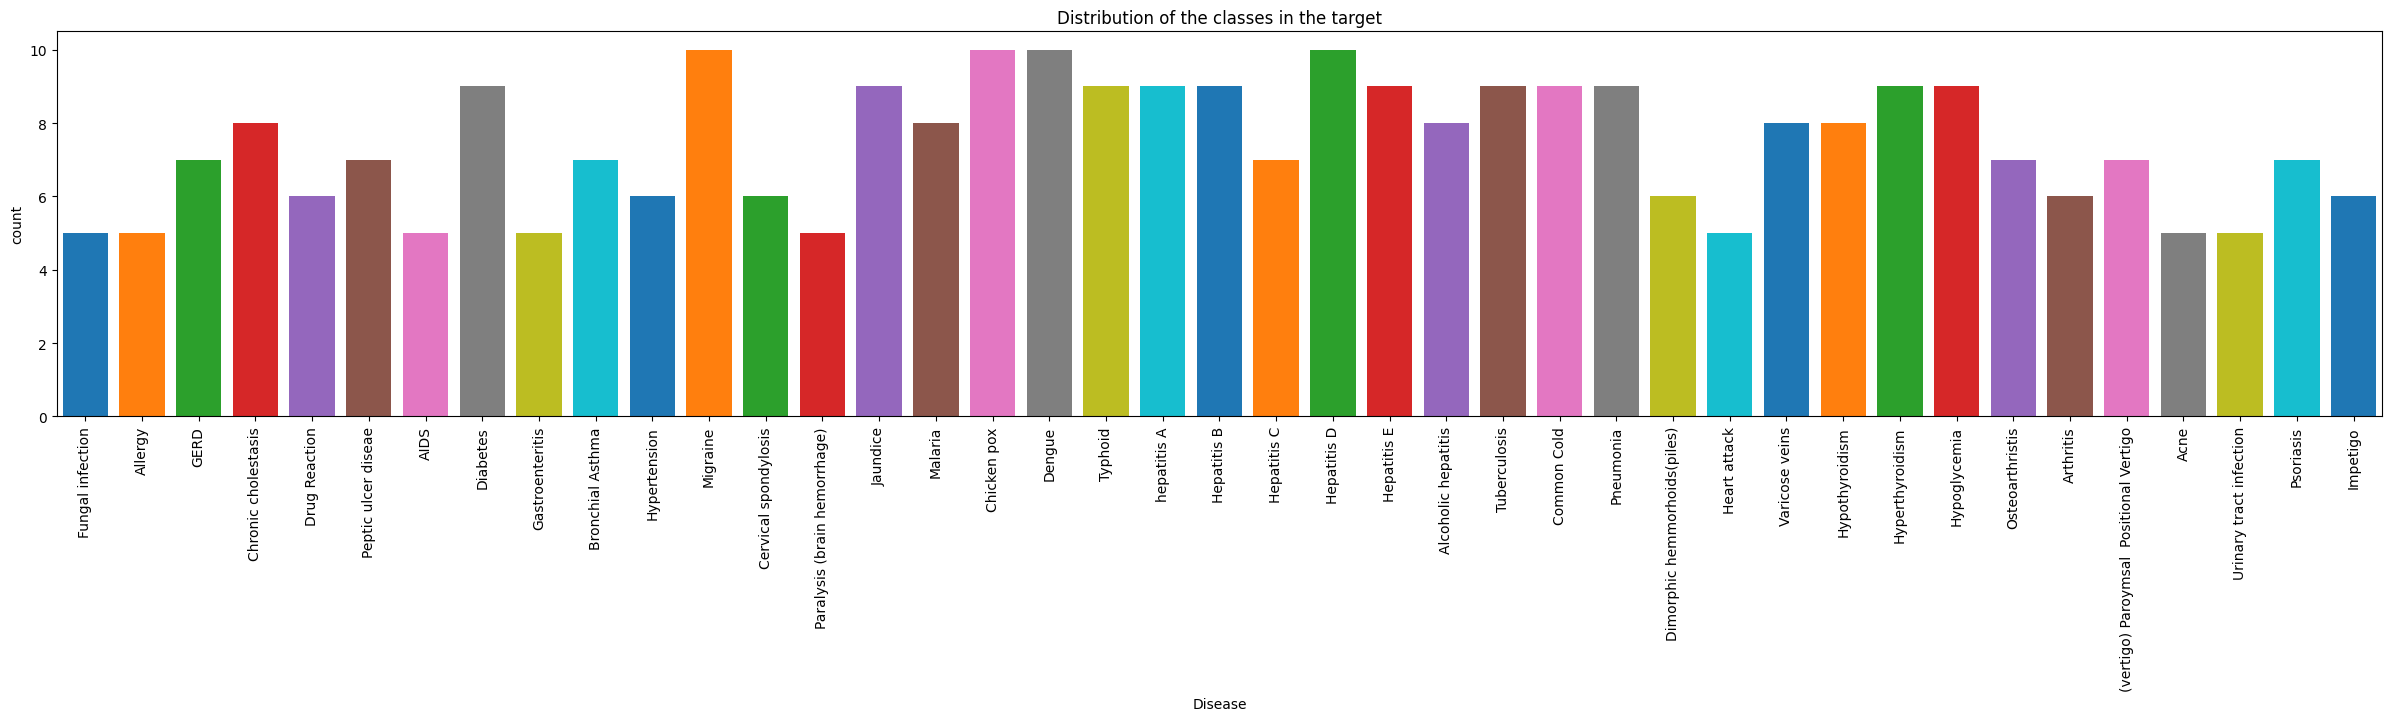

In [27]:
# visualize the classes in the target feature
plt.figure(figsize=(30,5))
sns.countplot(x='Disease', saturation = 1, palette = 'tab10', data=data)
plt.xticks(rotation=90)
plt.title('Distribution of the classes in the target')
plt.show()

In [28]:
# Sort the symptom_freq series in descending order
symptom_freq_sorted = symptom_freq.sort_values(ascending=False)
symptom_freq_sorted

fatigue                 134
vomiting                117
high_fever               89
loss_of_appetite         81
nausea                   77
                       ... 
watering_from_eyes        4
nodal_skin_eruptions      4
dischromic _patches       4
shivering                 4
scurring                  4
Length: 126, dtype: int64

In [29]:
# Get the most occurring 10 symptoms for EDA
symptoms_to_plot = [symptom for symptom, freq in symptom_freq_sorted.items()]

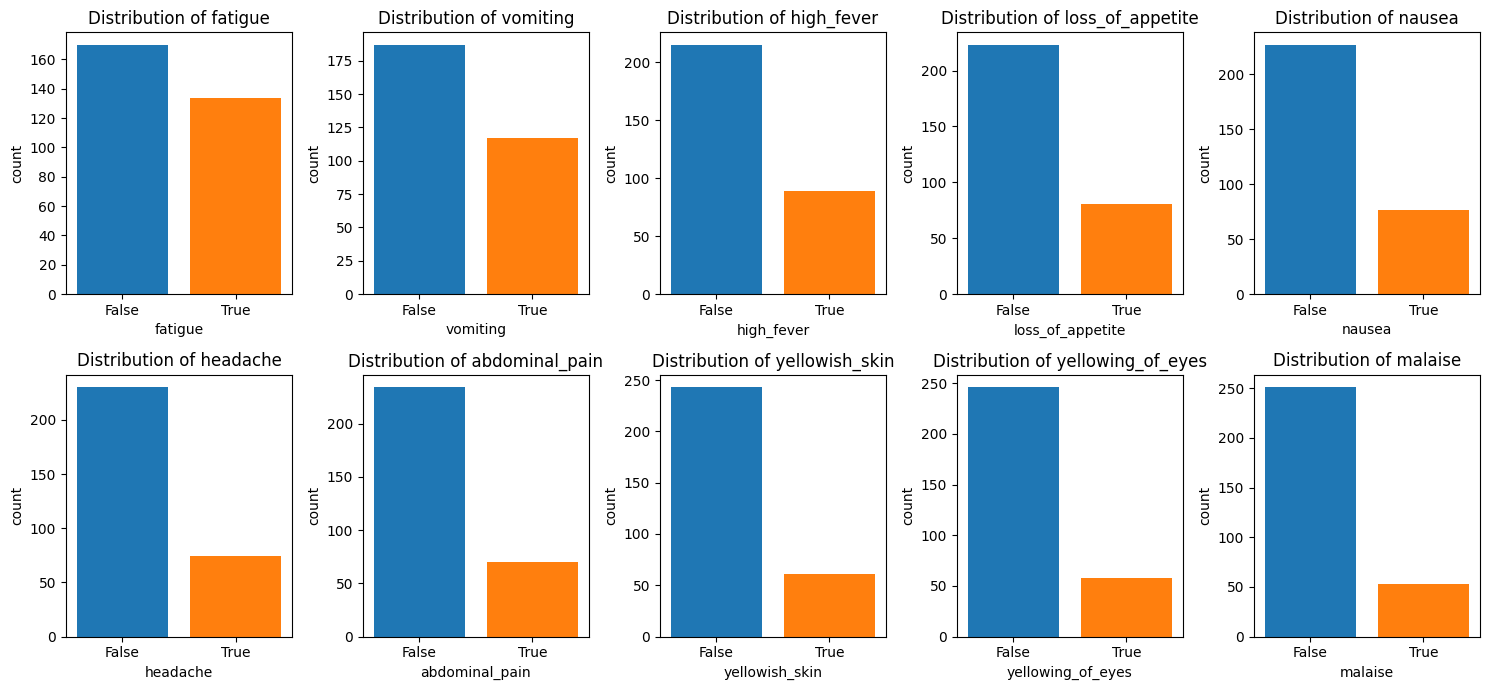

In [30]:
# Plot distribution of 10 most occurring symptoms
num_plots = len(symptoms_to_plot[:10])
cols = 5
rows = num_plots // cols  # Calculate rows needed for 5 plots per row
plt.figure(figsize=(15, 7))
for i, col in enumerate(symptoms_to_plot[:10], start=1):  # Iterate through first 10 features to plot
    plt.subplot(rows, cols, i)
    sns.countplot(x=col, saturation = 1, palette='tab10', data=data)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
plt.show()


_**Distribution of 5 top categorical features (symptoms) to the target**_


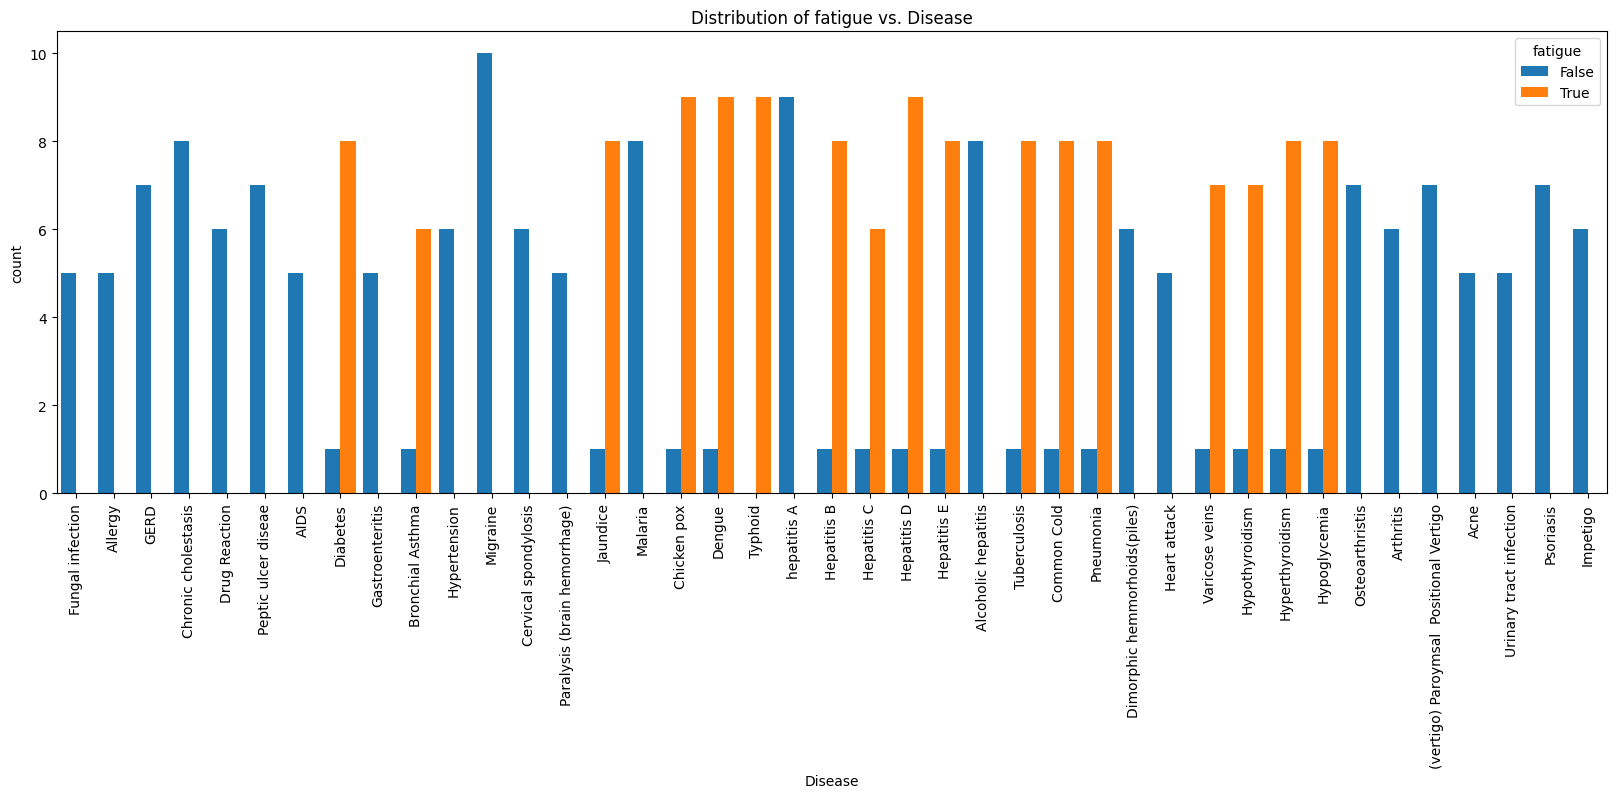

In [31]:
# Categorical features vs. target feature
plt.figure(figsize=(20, 6))
sns.countplot(x='Disease', hue=symptoms_to_plot[0], saturation = 1, palette = 'tab10', data=data)
plt.title(f'Distribution of {symptoms_to_plot[0]} vs. Disease')
plt.xticks(rotation=90)
plt.show()

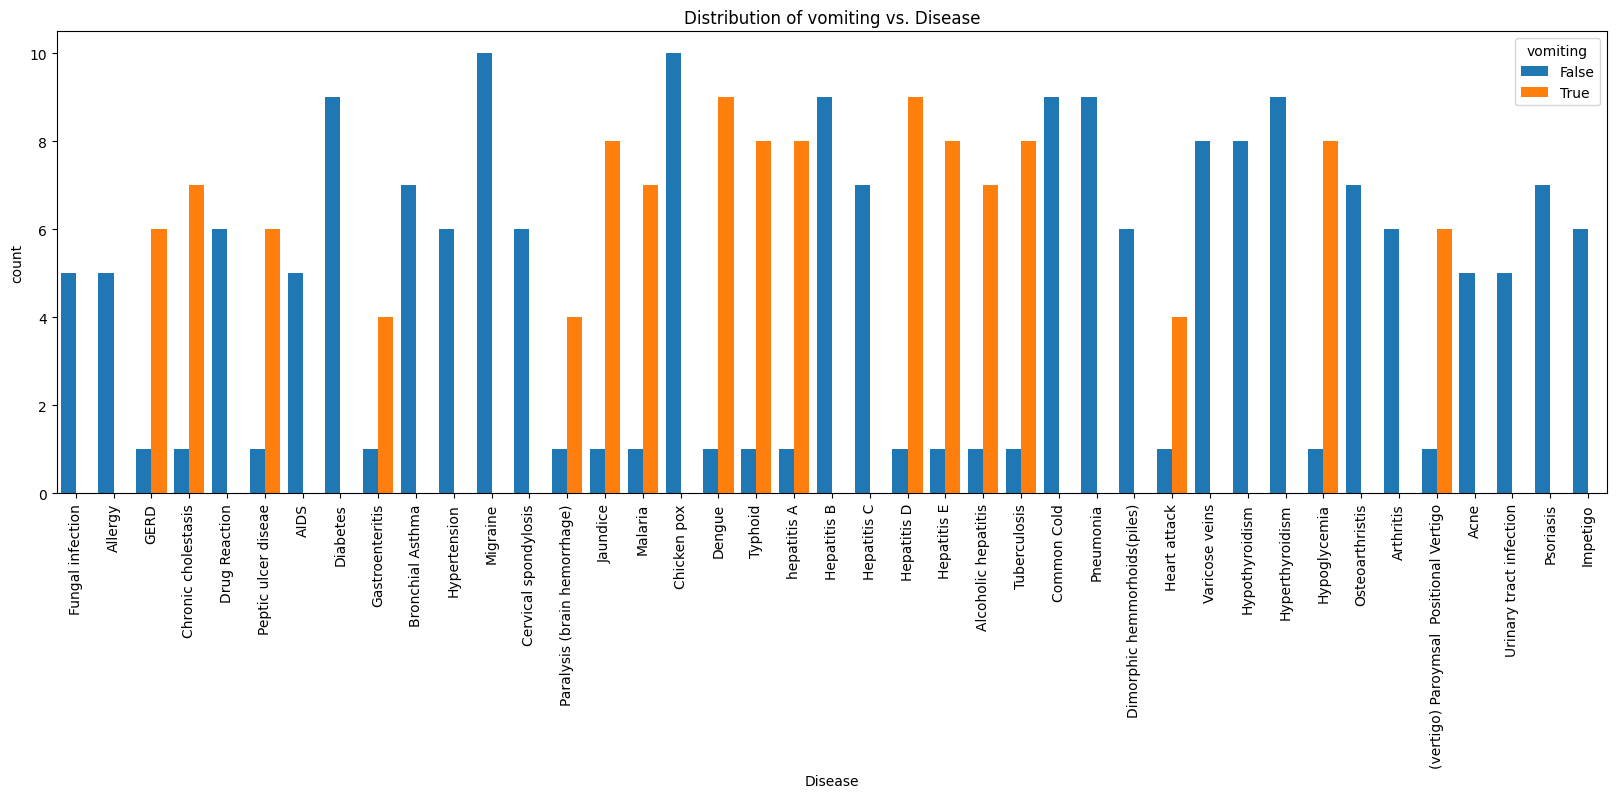

In [32]:
# Categorical features vs. target feature
plt.figure(figsize=(20, 6))
sns.countplot(x='Disease', hue=symptoms_to_plot[1], saturation = 1, palette = 'tab10', data=data)
plt.title(f'Distribution of {symptoms_to_plot[1]} vs. Disease')
plt.xticks(rotation=90)
plt.show()

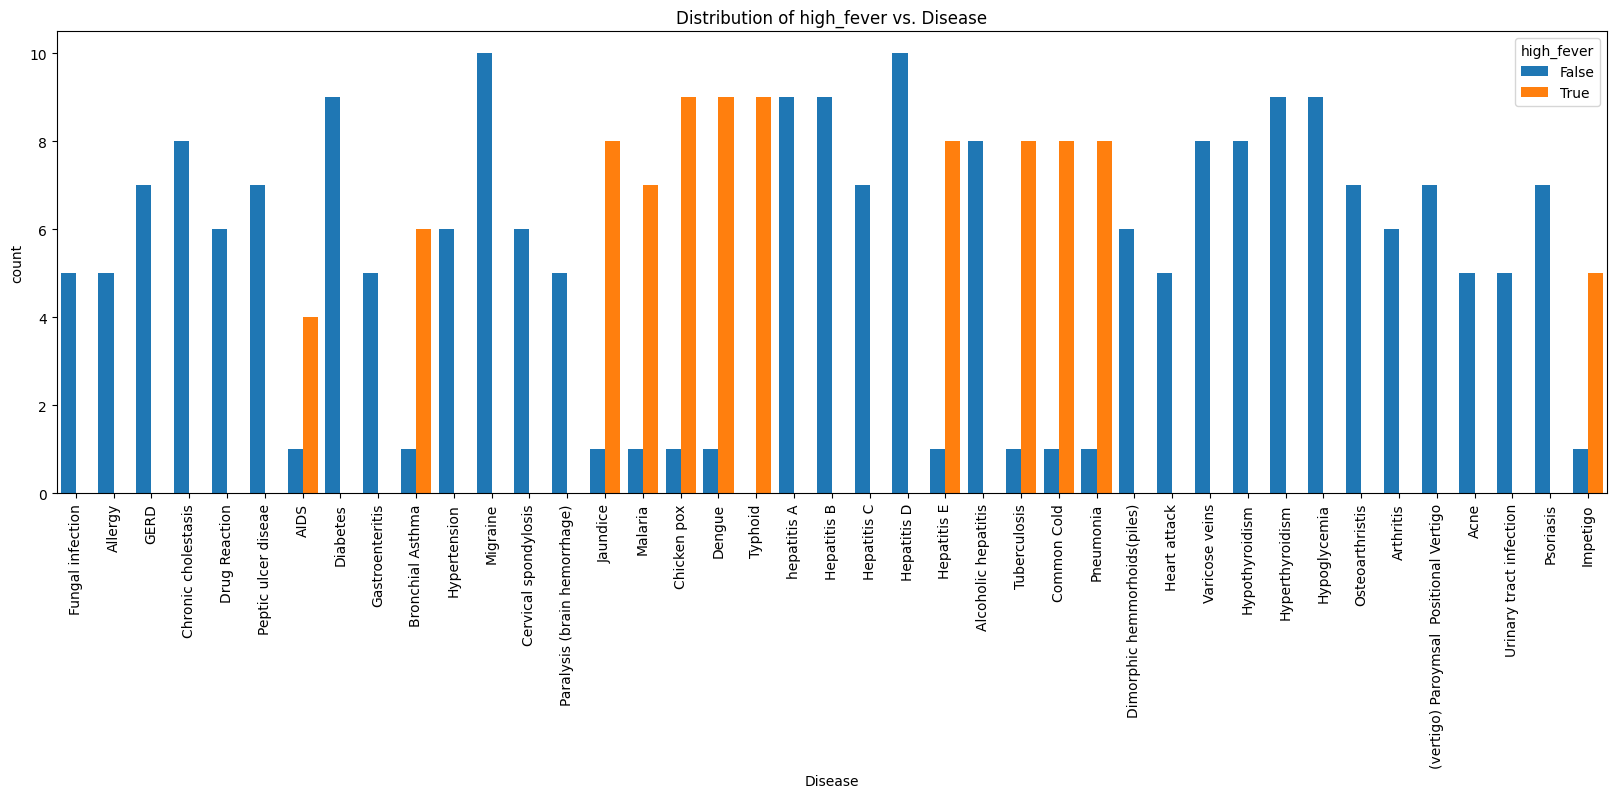

In [33]:
# Categorical features vs. target feature
plt.figure(figsize=(20, 6))
sns.countplot(x='Disease', hue=symptoms_to_plot[2], saturation = 1, palette = 'tab10', data=data)
plt.title(f'Distribution of {symptoms_to_plot[2]} vs. Disease')
plt.xticks(rotation=90)
plt.show()

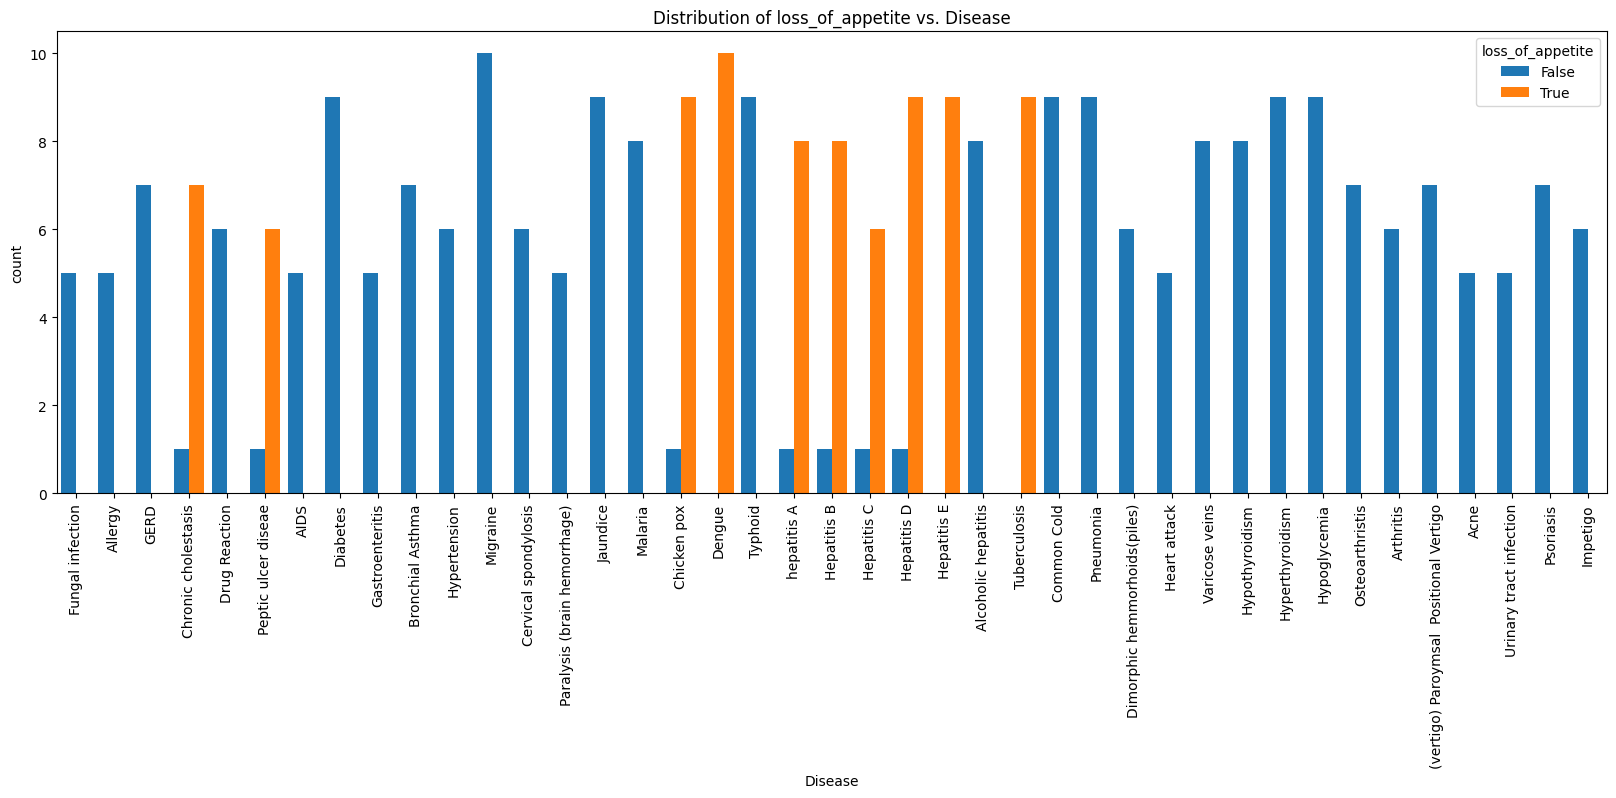

In [34]:
# Categorical features vs. target feature
plt.figure(figsize=(20, 6))
sns.countplot(x='Disease', hue=symptoms_to_plot[3], saturation = 1, palette = 'tab10', data=data)
plt.title(f'Distribution of {symptoms_to_plot[3]} vs. Disease')
plt.xticks(rotation=90)
plt.show()

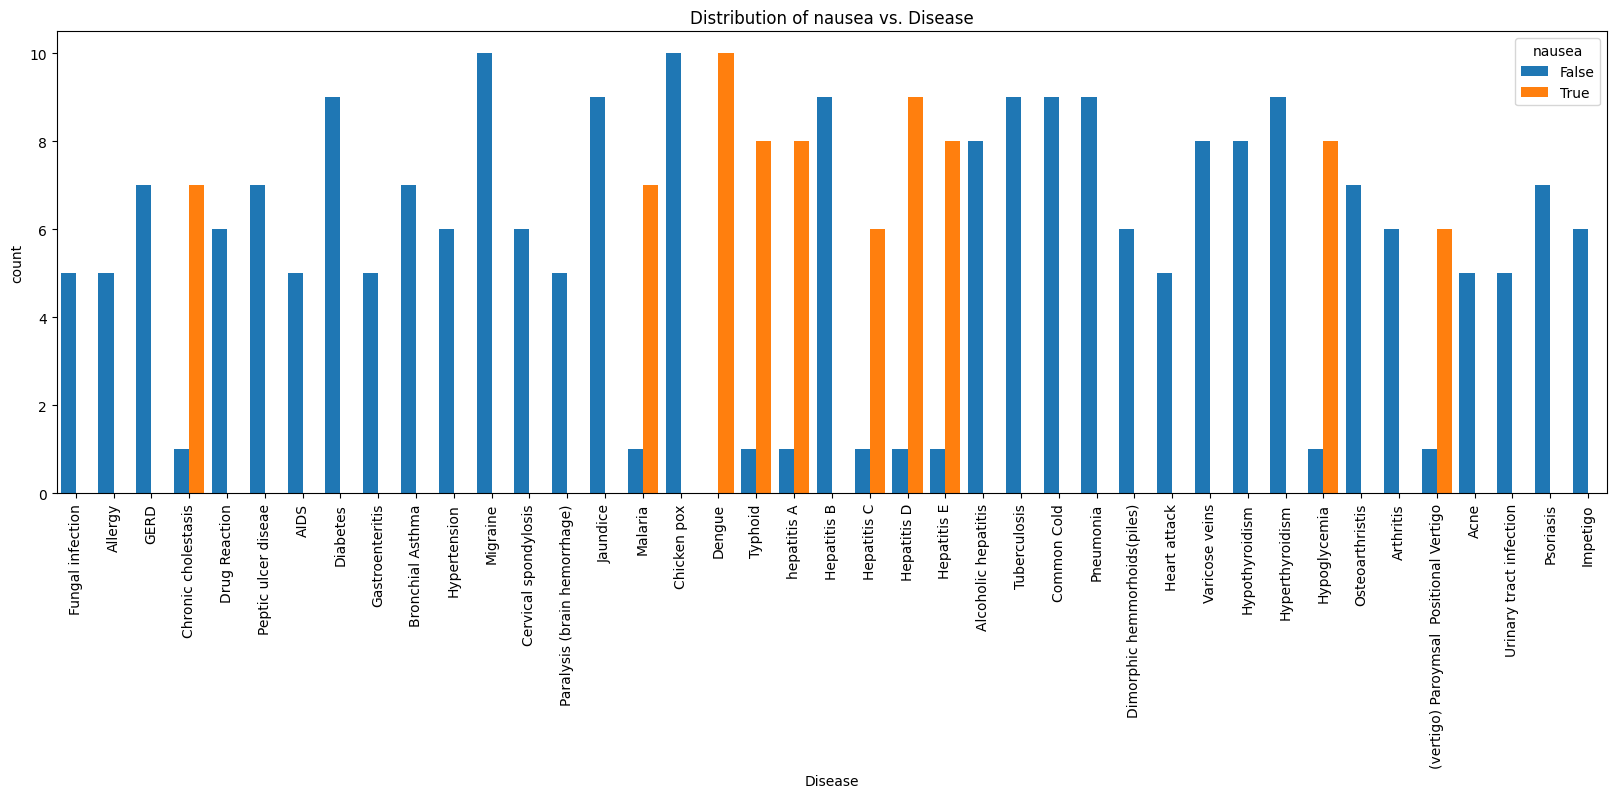

In [35]:
# Categorical features vs. target feature
plt.figure(figsize=(20, 6))
sns.countplot(x='Disease', hue=symptoms_to_plot[4], saturation = 1, palette = 'tab10', data=data)
plt.title(f'Distribution of {symptoms_to_plot[4]} vs. Disease')
plt.xticks(rotation=90)
plt.show()


## Feature Engineering

No feature need to be dropped at this point.



## Data Encoding


In [36]:
# Use LabelEncoder to assign numerical values to each class in the target
le = LabelEncoder()
data['Disease'] = le.fit_transform(data['Disease'])
# with open('label_encoder.pkl', 'wb') as f:
#    pickle.dump(le, f)

In [37]:
# Change False to 0 and True to 1
data.replace({False: 0, True: 1}, inplace=True)
data.head()

,Disease,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,continuous_sneezing,shivering,chills,watering_from_eyes,stomach_pain,...,bladder_discomfort,foul_smell_of urine,continuous_feel_of_urine,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
0,15,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,15,0,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,15,1,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,15,1,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,15,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
data.tail()

,Disease,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,continuous_sneezing,shivering,chills,watering_from_eyes,stomach_pain,...,bladder_discomfort,foul_smell_of urine,continuous_feel_of_urine,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
402,27,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
403,27,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
405,27,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
406,27,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
407,27,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0


In [39]:
# Verify the data types
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 304 entries, 0 to 407
Columns: 127 entries, Disease to yellow_crust_ooze
dtypes: int32(1), int64(126)
memory usage: 302.8 KB


In [40]:
# checking for missing values after encoding
data.isnull().sum()

Disease                 0
itching                 0
skin_rash               0
nodal_skin_eruptions    0
dischromic _patches     0
                       ..
small_dents_in_nails    0
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
Length: 127, dtype: int64

In [41]:
# displaying statistical summary
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Disease,304.0,20.680921,11.675487,0.0,10.75,21.0,30.0,40.0
itching,304.0,0.134868,0.342146,0.0,0.00,0.0,0.0,1.0
skin_rash,304.0,0.138158,0.345635,0.0,0.00,0.0,0.0,1.0
nodal_skin_eruptions,304.0,0.013158,0.114139,0.0,0.00,0.0,0.0,1.0
dischromic _patches,304.0,0.013158,0.114139,0.0,0.00,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
small_dents_in_nails,304.0,0.019737,0.139324,0.0,0.00,0.0,0.0,1.0
inflammatory_nails,304.0,0.019737,0.139324,0.0,0.00,0.0,0.0,1.0
blister,304.0,0.016447,0.127398,0.0,0.00,0.0,0.0,1.0
red_sore_around_nose,304.0,0.016447,0.127398,0.0,0.00,0.0,0.0,1.0


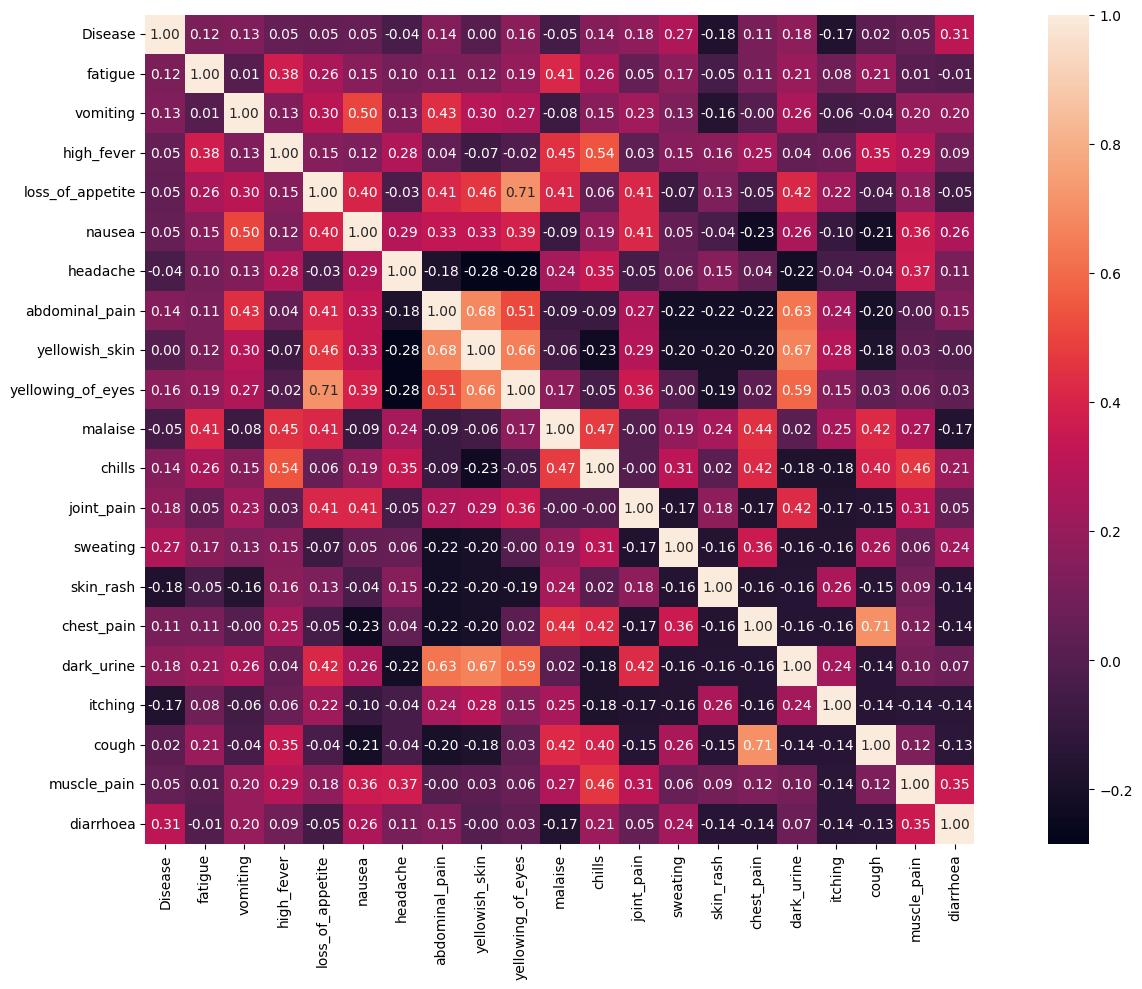

In [42]:
# correlation matrix for the 20 highest occurring symptoms
corr_data = data[symptoms_to_plot[:20]]
corr_data = pd.concat([data['Disease'], corr_data], axis=1)
corr_matrix = corr_data.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', square=True)
plt.tight_layout()
plt.show()


## Model Development

Here, all selected models are trained



### Splitting Dataset


In [43]:
# predictor variables and outcome
X = data.drop('Disease', axis = 1)
Y = data['Disease']
X.head()

,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,continuous_sneezing,shivering,chills,watering_from_eyes,stomach_pain,acidity,...,bladder_discomfort,foul_smell_of urine,continuous_feel_of_urine,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
0,1,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
# splitting the data to train and test sets
# 80% for train set and 20% for test set
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.2, stratify=Y, random_state=42)
print(X.shape, X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(304, 126) (243, 126) (243,) (61, 126) (61,)



### Feature Scaling | Data Normalization

_All features have a standard scale of measure, so this is skipped._


In [45]:
# data normalization

# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)


### Training the model

In [46]:
# Decision tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, Y_train)
dt_Y_pred = dt_model.predict(X_test)

# Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, Y_train)
rf_Y_pred = rf_model.predict(X_test)
# with open('model.pkl', 'wb') as f:
#    pickle.dump(rf_model, f)

dt_accuracy = metrics.accuracy_score(Y_test, dt_Y_pred)
dt_recall = metrics.recall_score(Y_test, dt_Y_pred, average='weighted')
dt_precision = metrics.precision_score(Y_test, dt_Y_pred, average='weighted')

rf_accuracy = metrics.accuracy_score(Y_test, rf_Y_pred)
rf_recall = metrics.recall_score(Y_test, rf_Y_pred, average="weighted")
rf_precision = metrics.precision_score(Y_test, rf_Y_pred, average="weighted")

pd.DataFrame({
    'Accuracy': [dt_accuracy, rf_accuracy],
    'Recall': [dt_recall, rf_recall],
    'Precision': [dt_precision, rf_precision]
}, index=['Decision Tree', 'Random Forest'])

,Accuracy,Recall,Precision
Decision Tree,0.704918,0.704918,0.715164
Random Forest,1.000000,1.000000,1.000000


In [47]:
# classification report for Decision Tree
print('Classification Report for Decision Tree')
print(metrics.classification_report(Y_test, dt_Y_pred, target_names=le.classes_))

Classification Report for Decision Tree
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00         1
                                   AIDS       0.12      1.00      0.22         1
                                   Acne       0.00      0.00      0.00         1
                    Alcoholic hepatitis       1.00      0.50      0.67         2
                                Allergy       1.00      1.00      1.00         1
                              Arthritis       0.00      0.00      0.00         1
                       Bronchial Asthma       1.00      1.00      1.00         1
                   Cervical spondylosis       0.00      0.00      0.00         1
                            Chicken pox       1.00      1.00      1.00         2
                    Chronic cholestasis       0.33      0.50      0.40         2
                            Common Cold       1.00      1.00      1.

In [48]:
# classification report Random Forest
print('Classification Report for Random Forest')
print(metrics.classification_report(Y_test, rf_Y_pred, target_names=le.classes_))

Classification Report for Random Forest
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00         1
                                   AIDS       1.00      1.00      1.00         1
                                   Acne       1.00      1.00      1.00         1
                    Alcoholic hepatitis       1.00      1.00      1.00         2
                                Allergy       1.00      1.00      1.00         1
                              Arthritis       1.00      1.00      1.00         1
                       Bronchial Asthma       1.00      1.00      1.00         1
                   Cervical spondylosis       1.00      1.00      1.00         1
                            Chicken pox       1.00      1.00      1.00         2
                    Chronic cholestasis       1.00      1.00      1.00         2
                            Common Cold       1.00      1.00      1.


## Model Optimization



### Applying sampling technique to balance the dataset


In [49]:
# using SMOTE to balance the dataset
from imblearn.over_sampling import SMOTE

In [50]:
# Apply SMOTE
smote = SMOTE(k_neighbors=3, random_state=42)
X_train_resampled, Y_train_resampled = smote.fit_resample(X_train, Y_train)
print(X_train_resampled.shape, Y_train_resampled.shape)

(328, 126) (328,)


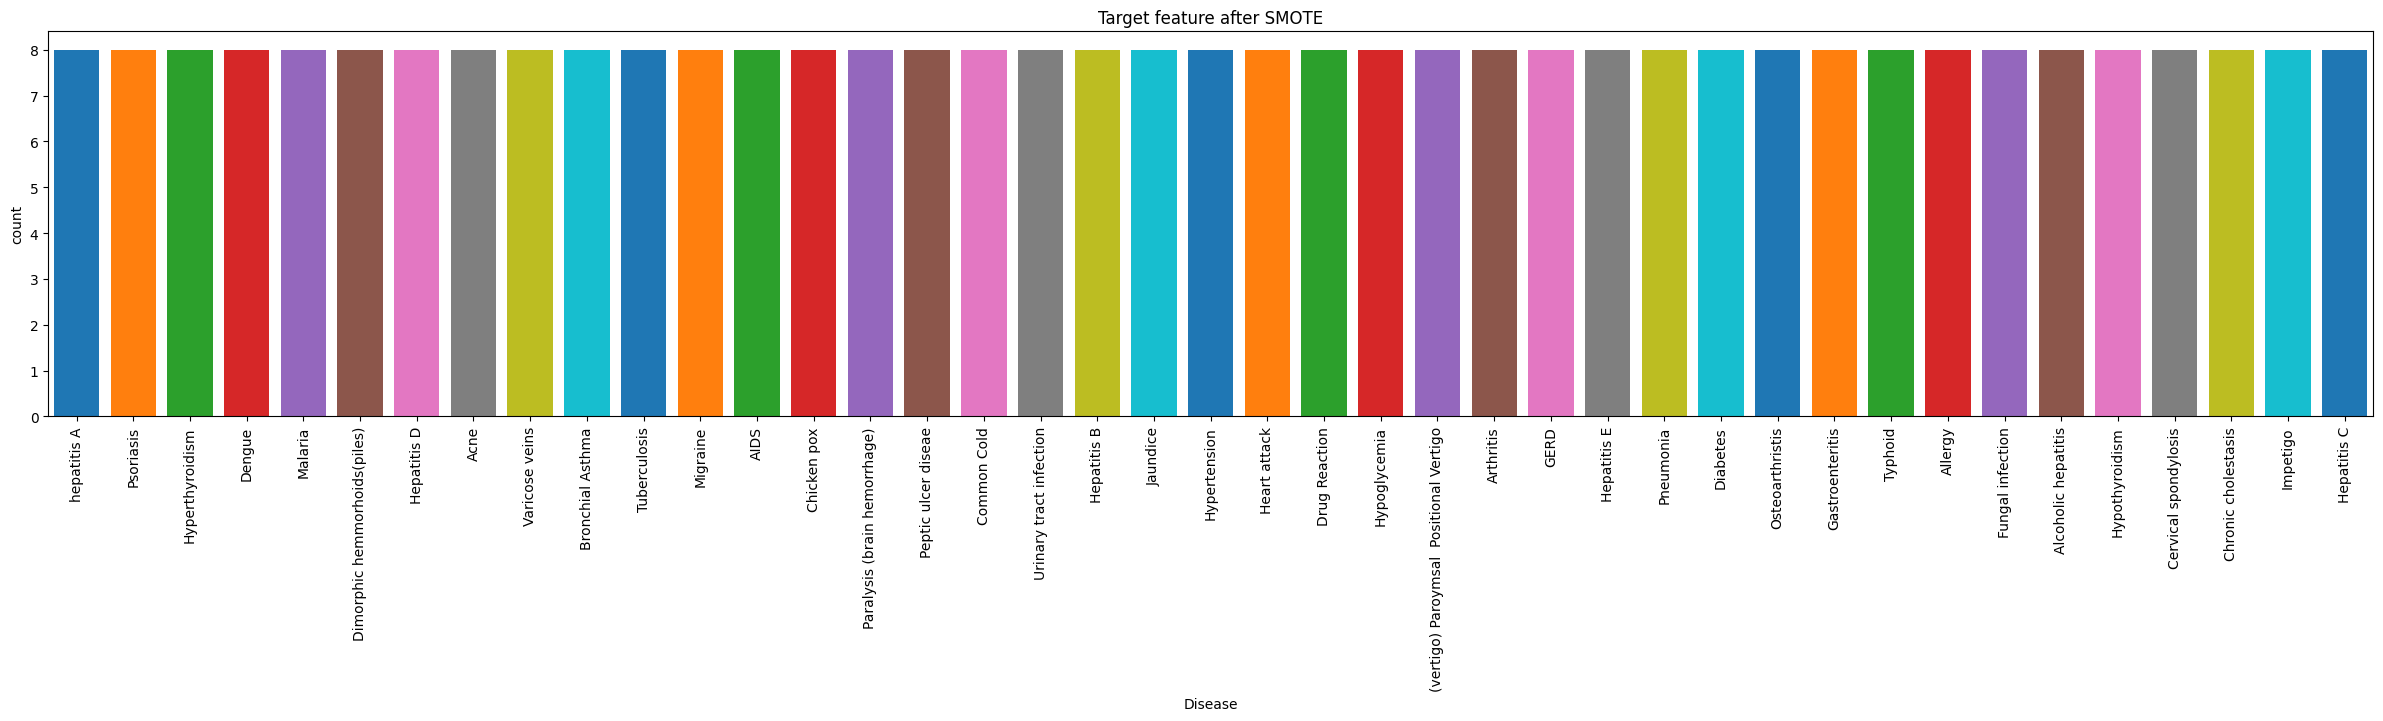

In [51]:
# visualize the classes in the target feature
plt.figure(figsize=(30,5))
sns.countplot(x='Disease', data=pd.DataFrame(le.inverse_transform(Y_train_resampled), columns=['Disease']), saturation = 1, palette = 'tab10')
plt.xticks(rotation=90)
plt.title('Target feature after SMOTE')
plt.show()


### K-Fold Cross-validation


In [52]:
# Perform 10-fold cross-validation for the underperformed model decision tree
cv = KFold(n_splits=10, shuffle=True, random_state=42)
dt_cv_results = cross_val_score(dt_model, X_train_resampled, Y_train_resampled, cv=cv)
rf_cv_results = cross_val_score(rf_model, X_train_resampled, Y_train_resampled, cv=cv)
print(f'Average accuracy for Decision Tree: {dt_cv_results.mean()}')
print(f'Average accuracy for Random Forest: {rf_cv_results.mean()}')

Average accuracy for Decision Tree: 0.8288825757575757
Average accuracy for Random Forest: 1.0



### Hyperparameter Tuning

Some hyperparameter values are defined, and an exhaustive search is performed to find the best combination of hyperparameter values that yields the best model performance.


In [53]:
# Define the parameter grid for all classifiers
dt_param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'splitter': ['best', 'random'],
    'max_depth': [3, 5, 7, 9, None],
    'min_samples_split': [2, 4, 6],
    'random_state': [42, None]
}

rf_param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [None, 10, 20, 30],
    'max_features': ['sqrt', 'log2', None]
}



#### Grid Search

The essence of this is to perform an exhaustive search to find the best combination of hyperparameters values that yield the best model performance.


In [54]:
# Perform an exhaustive search on all specified hyperparameter values for the classifier
dt_grid_search = GridSearchCV(estimator=dt_model, param_grid=dt_param_grid, cv=cv, n_jobs=-1, scoring='accuracy')
dt_grid_search.fit(X_train_resampled, Y_train_resampled)

# computing the best values
best_dt_params = dt_grid_search.best_params_
best_dt_model = dt_grid_search.best_estimator_
dt_score = dt_grid_search.best_score_

# Evaluate the best Decision Tree Classifier model on test
best_dt_Y_pred = best_dt_model.predict(X_test)
best_dt_accuracy = metrics.accuracy_score(Y_test, best_dt_Y_pred)

# display results
print('For Decision Tree: ')
print(f'Best Hyperparameters for Decision Tree: {best_dt_params}')
print(f'Best decision tree test Accuracy: {best_dt_accuracy}')
print(f'Best decision tree test Recall: {metrics.recall_score(Y_test, best_dt_Y_pred, average="macro")}')
print(f'Best decision tree test Precision: {metrics.precision_score(Y_test, best_dt_Y_pred, average="macro")}')

For Decision Tree: 
Best Hyperparameters for Decision Tree: {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'random_state': 42, 'splitter': 'random'}
Best decision tree test Accuracy: 0.6885245901639344
Best decision tree test Recall: 0.6341463414634146
Best decision tree test Precision: 0.6691056910569105


In [55]:
# classification report for Decision Tree
print('Classification Report for Decision Tree')
print(metrics.classification_report(Y_test, best_dt_Y_pred, target_names=le.classes_))

Classification Report for Decision Tree
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00         1
                                   AIDS       1.00      1.00      1.00         1
                                   Acne       0.00      0.00      0.00         1
                    Alcoholic hepatitis       1.00      0.50      0.67         2
                                Allergy       1.00      1.00      1.00         1
                              Arthritis       0.00      0.00      0.00         1
                       Bronchial Asthma       1.00      1.00      1.00         1
                   Cervical spondylosis       0.00      0.00      0.00         1
                            Chicken pox       1.00      1.00      1.00         2
                    Chronic cholestasis       0.33      0.50      0.40         2
                            Common Cold       1.00      1.00      1.

In [56]:
# Perform an exhaustive search on all specified hyperparameter values for the classifier
rf_grid_search = GridSearchCV(estimator=rf_model, param_grid=rf_param_grid, cv=cv, n_jobs=-1, scoring='accuracy')
rf_grid_search.fit(X_train_resampled, Y_train_resampled)

# computing the best values
best_rf_params = rf_grid_search.best_params_
best_rf_model = rf_grid_search.best_estimator_
rf_score = rf_grid_search.best_score_

# Evaluate the best Decision Tree Classifier model on test
best_rf_Y_pred = best_rf_model.predict(X_test)
best_rf_accuracy = metrics.accuracy_score(Y_test, best_rf_Y_pred)

# display results
print('For Random Forest: ')
print(f'Best Hyperparameters for Random Forest: {best_rf_params}')
print(f'Best random forest test Accuracy: {best_rf_accuracy}')
print(f'Best random forest test Recall: {metrics.recall_score(Y_test, best_rf_Y_pred, average="macro")}')
print(f'Best random forest test Precision: {metrics.precision_score(Y_test, best_rf_Y_pred, average="macro")}')

For Decision Tree: 
Best Hyperparameters for Random Forest: {'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 100}
Best random forest test Accuracy: 1.0
Best random forest test Recall: 1.0
Best random forest test Precision: 1.0


In [57]:
# classification report Random Forest
print('Classification Report for Random Forest')
print(metrics.classification_report(Y_test, best_rf_Y_pred, target_names=le.classes_))

Classification Report for Random Forest
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00         1
                                   AIDS       1.00      1.00      1.00         1
                                   Acne       1.00      1.00      1.00         1
                    Alcoholic hepatitis       1.00      1.00      1.00         2
                                Allergy       1.00      1.00      1.00         1
                              Arthritis       1.00      1.00      1.00         1
                       Bronchial Asthma       1.00      1.00      1.00         1
                   Cervical spondylosis       1.00      1.00      1.00         1
                            Chicken pox       1.00      1.00      1.00         2
                    Chronic cholestasis       1.00      1.00      1.00         2
                            Common Cold       1.00      1.00      1.


## Model Explanation



### Feature Importance



#### Decision Tree


                 Feature  Importance
6                 chills    0.049089
63  pain_behind_the_eyes    0.025000
83          rusty_sputum    0.025000
47            depression    0.025000
56              sweating    0.025000
57           muscle_pain    0.025000
61   red_spots_over_body    0.025000
67          yellow_urine    0.025000
68                  coma    0.025000
73        fluid_overload    0.025000


<Axes: title={'center': 'Feature importance for Decision Tree'}, ylabel='Feature'>

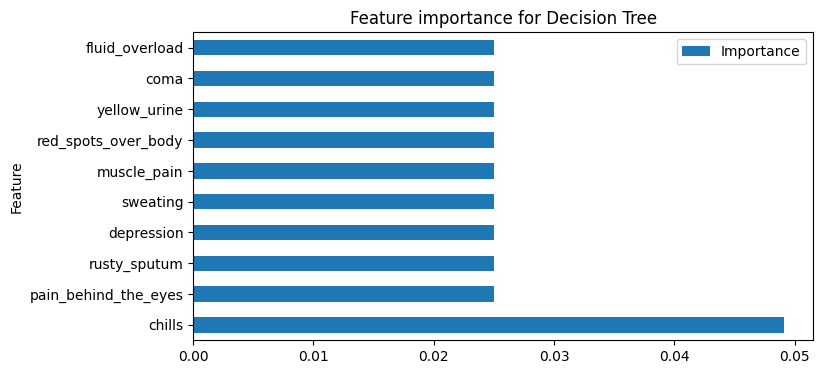

In [58]:
# feature importance for the BEST Decision Tree classifier
importance = best_dt_model.feature_importances_
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': importance})
feature_importance = feature_importance.sort_values('Importance', ascending=False)[:10]
print(feature_importance)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(8, 4), title='Feature importance for Decision Tree')


#### Random Forest


                Feature  Importance
27              fatigue    0.023118
57          muscle_pain    0.020035
56             sweating    0.019740
11             vomiting    0.017389
62           joint_pain    0.017349
116  bladder_discomfort    0.016361
42             headache    0.015903
0               itching    0.015656
15               nausea    0.015123
39            diarrhoea    0.015019


<Axes: title={'center': 'Feature importance for Random Forest'}, ylabel='Feature'>

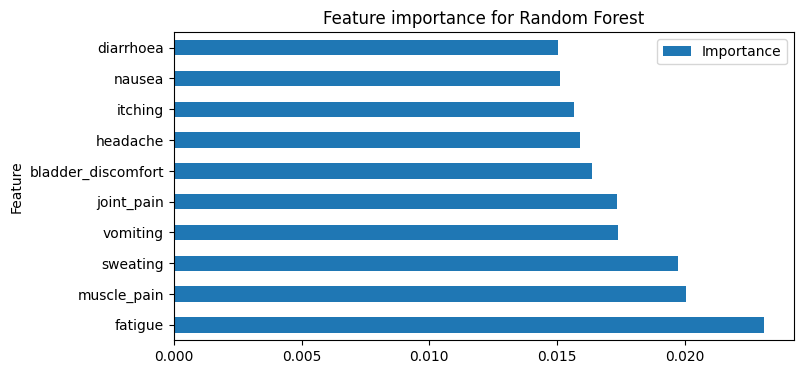

In [59]:
# feature importance for the BEST Random Forest classifier
importance = best_rf_model.feature_importances_
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': importance})
feature_importance = feature_importance.sort_values('Importance', ascending=False)[:10]
print(feature_importance)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(8, 4), title='Feature importance for Random Forest')


_*Random Forest being the best performing model will be used for subsequent predictions.*_
